<a href="https://colab.research.google.com/github/Vinitha3349/writ-1-/blob/main/ST20320161.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TASK 1: DATA ANALYTICS USING PYTHON
# Dataset: Missouri Active Alcohol License Data
# Dataset link: https://catalog.data.gov/dataset/missouri-active-alcohol-license-data

In [13]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [14]:
# Display settings
pd.set_option('display.max_columns', None)

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
df = pd.read_csv("/content/MyDrive/masuri dataset/Missouri_Active_Alcohol_License_Data (1).csv")

In [17]:
# Preview
df.head()

,LICENSEE,DBANAME,STREET NUMBER,STREET,CITY,STATE,ZIPCODE,PHONE NUMBER,PRIMARY LICENSE,SECONDARY LICENSE,PRIMARY TYPE,SECONDARY TYPE,COUNTY,DISTRICT,SUBDIST,LATLNG,Assoc,First Name,Last Name,Phone
0,CA KAUTZ LLC,WICKED WILLIES SPORTS GRILL,5384,OSAGE BEACH PARKWAY,OSAGE BEACH,MO,65065,5736931777,288686,288687,RBD,SBD,CAMDEN,2,0,NaN,MGR,CHAD,KAUTZ,5732161545
1,WATERWAY GAS AND WASH,WATERWAY GAS & WASH COMPANY,10850,MANCHESTER RD,KIRKWOOD,MO,63122,3149653757,288708,288709,OPL,SOP,ST. LOUIS CO.,3,0,NaN,MGR,MICHAEL,GOLDMAN,6365373551
2,PERMACULTURE LLC,BLACK MOUNTAIN WINE HOUSE STL,354,-56 N BOYLE AVE,SAINT LOUIS,MO,63108,0,288717,288718,RBD,SBD,ST. LOUIS CITY,3,0,NaN,MGR,JOSEPH,BAKER,7208404210
3,"PIERPONT'S AT UNION STATION, LLC",PIERPONT'S AT UNION STATION,30,"W. PERSHING RD., STE 900 & 340",KANSAS CITY,MO,64108,8162215111,238958,238959,RBD,SBD,JACKSON,1,0,NaN,MGR,CAMELLIA,HILL,8165642749
4,JJG SELECT HOLDINGS LLC,CJ'S RESTAURANT AND BAR,2974,HIGHWAY K,O'FALLON,MO,63368,6369787355,288704,288705,RBD,SBD,ST. CHARLES,3,0,NaN,MGR,JOHN,GODIER,3146400003


In [18]:
# Basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18340 entries, 0 to 18339
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   LICENSEE           18340 non-null  object
 1   DBANAME            18272 non-null  object
 2   STREET NUMBER      18039 non-null  object
 3   STREET             18340 non-null  object
 4   CITY               18340 non-null  object
 5   STATE              18340 non-null  object
 6   ZIPCODE            18340 non-null  int64 
 7   PHONE NUMBER       18340 non-null  int64 
 8   PRIMARY LICENSE    18340 non-null  int64 
 9   SECONDARY LICENSE  18340 non-null  int64 
 10  PRIMARY TYPE       18340 non-null  object
 11  SECONDARY TYPE     14590 non-null  object
 12  COUNTY             18340 non-null  object
 13  DISTRICT           18340 non-null  int64 
 14  SUBDIST            18340 non-null  int64 
 15  LATLNG             5035 non-null   object
 16  Assoc              18340 non-null  objec

In [19]:
# Summary statistics (numeric columns)
df.describe()

,ZIPCODE,PHONE NUMBER,PRIMARY LICENSE,SECONDARY LICENSE,DISTRICT,SUBDIST,Phone
count,1.834000e+04,1.834000e+04,18340.000000,18340.000000,18340.000000,18340.0,1.834000e+04
mean,2.271039e+08,5.598851e+09,234057.207252,167413.757415,3.354144,0.0,5.540162e+09
std,3.348312e+08,1.972159e+09,71955.724886,123040.502072,1.898723,0.0,2.013425e+09
min,1.938000e+03,0.000000e+00,7.000000,0.000000,1.000000,0.0,-8.568408e+09
25%,6.370300e+04,4.173382e+09,197067.500000,0.000000,2.000000,0.0,4.054505e+09
50%,6.520100e+04,5.736258e+09,257708.000000,215169.000000,3.000000,0.0,5.736357e+09
75%,6.313921e+08,7.072650e+09,289814.000000,280593.500000,5.000000,0.0,7.072573e+09
max,9.980195e+08,1.000000e+10,314194.000000,314195.000000,7.000000,0.0,9.893920e+09


In [20]:
# INITIAL DATA QUALITY CHECKS

In [21]:
# Count missing values
missing = df.isnull().sum()
print(missing)

LICENSEE                 0
DBANAME                 68
STREET NUMBER          301
STREET                   0
CITY                     0
STATE                    0
ZIPCODE                  0
PHONE NUMBER             0
PRIMARY LICENSE          0
SECONDARY LICENSE        0
PRIMARY TYPE             0
SECONDARY TYPE        3750
COUNTY                   0
DISTRICT                 0
SUBDIST                  0
LATLNG               13305
Assoc                    0
First Name             346
Last Name                4
Phone                    0
dtype: int64


In [42]:
# Shape
print("Rows:", df.shape[0], "Columns:", df.shape[1])

Rows: 18340 Columns: 21


In [43]:
# Check duplicates
print("Duplicate rows:", df.duplicated().sum())

Duplicate rows: 0


In [24]:
# PREPROCESSING

In [44]:
# 1. Handle missing values
# Fill missing DBANAME with LICENSEE
df['DBANAME'] = df['DBANAME'].fillna(df['LICENSEE'])

# Fill missing STREET NUMBER with 'Unknown'
df['STREET NUMBER'] = df['STREET NUMBER'].fillna('Unknown')

# Fill missing FIRST NAME
df['First Name'] = df['First Name'].fillna('Unknown')

# Fill missing SECONDARY TYPE as 'None'
df['SECONDARY TYPE'] = df['SECONDARY TYPE'].fillna('None')

In [27]:
# DATA TYPE FIXES

In [28]:
# Ensure ZIPCODE is string
df['ZIPCODE'] = df['ZIPCODE'].astype(str)

# Convert district codes to category
df['DISTRICT'] = df['DISTRICT'].astype('category')
df['SUBDIST'] = df['SUBDIST'].astype('category')

# Drop original LATLNG column
df.drop(columns=['LATLNG'], inplace=True)

In [29]:
# OUTLIER CHECKS

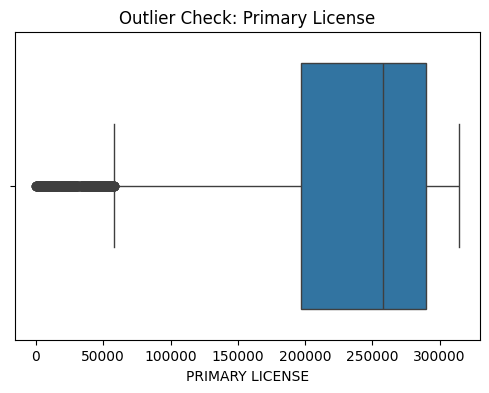

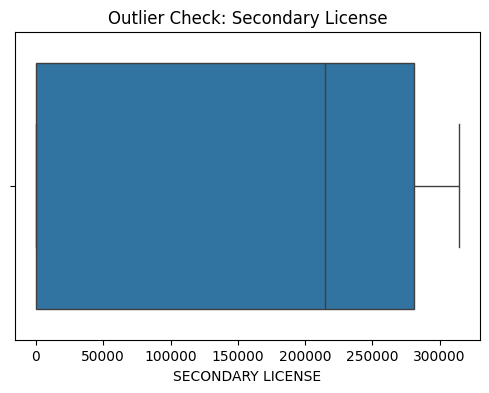

In [30]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['PRIMARY LICENSE'])
plt.title("Outlier Check: Primary License")
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x=df['SECONDARY LICENSE'])
plt.title("Outlier Check: Secondary License")
plt.show()

In [31]:
# Frequency check for unusual license codes
print("PRIMARY LICENSE value counts:")
print(df['PRIMARY LICENSE'].value_counts().head(15))
print()

print("SECONDARY LICENSE value counts:")
print(df['SECONDARY LICENSE'].value_counts().head(15))
print()

PRIMARY LICENSE value counts:
PRIMARY LICENSE
110936    21
242423    13
242419    13
242417    13
242421    13
242415    13
241389     9
241391     9
103829     9
163621     8
93946      8
101541     8
177624     8
101613     7
163166     6
Name: count, dtype: int64

SECONDARY LICENSE value counts:
SECONDARY LICENSE
0         5374
147681      21
242420      13
242418      13
242424      13
242422      13
242416      13
241390       9
146961       9
241392       9
101542       8
101614       7
101651       5
177623       4
177625       4
Name: count, dtype: int64



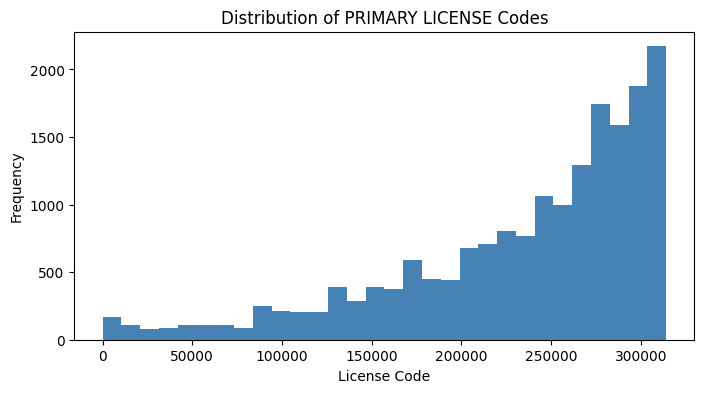

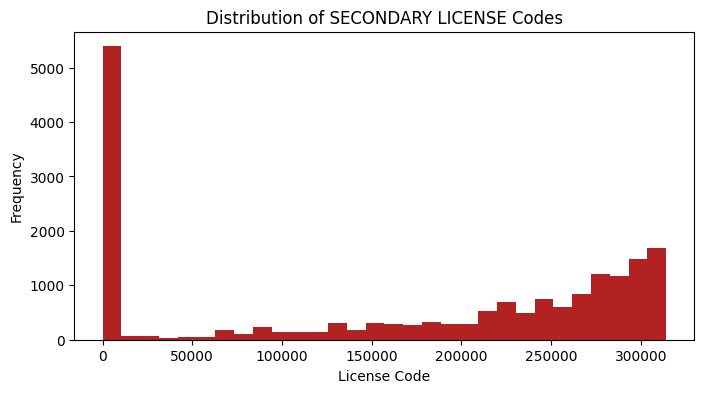

In [32]:
# Histogram for numeric distributions (better than boxplots here)
plt.figure(figsize=(8,4))
plt.hist(df['PRIMARY LICENSE'], bins=30, color='steelblue')
plt.title("Distribution of PRIMARY LICENSE Codes")
plt.xlabel("License Code")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(8,4))
plt.hist(df['SECONDARY LICENSE'], bins=30, color='firebrick')
plt.title("Distribution of SECONDARY LICENSE Codes")
plt.xlabel("License Code")
plt.ylabel("Frequency")
plt.show()

In [33]:
# EXPLORATORY DATA ANALYSIS (EDA)

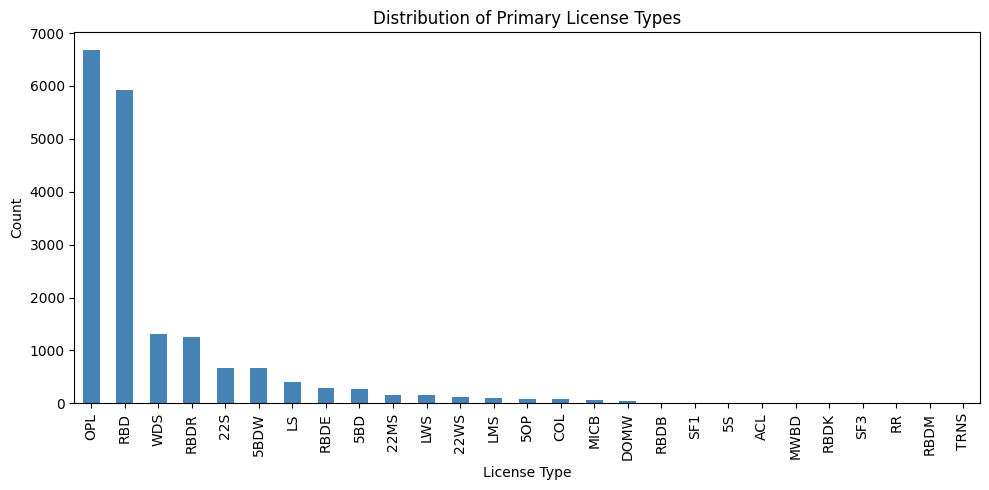

In [34]:
# 1. License counts by primary type
plt.figure(figsize=(10,5))
df['PRIMARY TYPE'].value_counts().plot(kind='bar', color='steelblue')
plt.title("Distribution of Primary License Types")
plt.xlabel("License Type")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

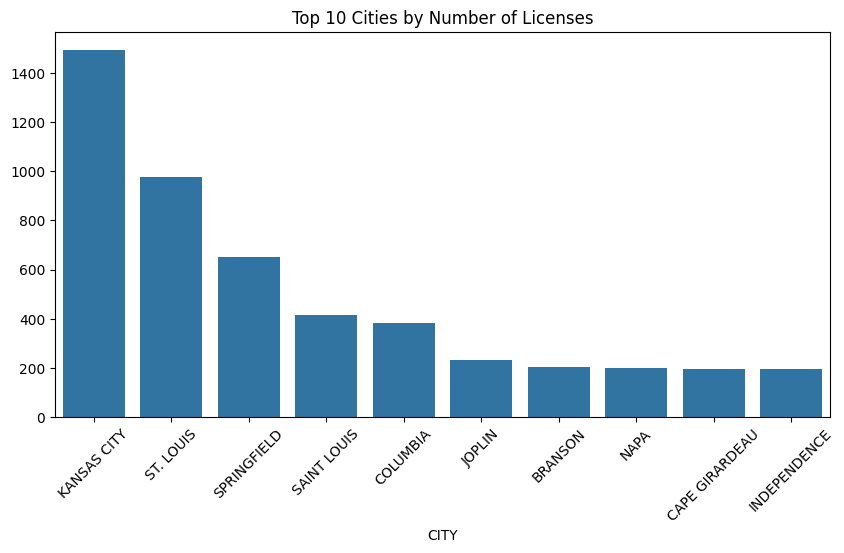

In [35]:
# 2. Top 10 cities with most licenses
top_cities = df['CITY'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_cities.index, y=top_cities.values)
plt.title("Top 10 Cities by Number of Licenses")
plt.xticks(rotation=45)
plt.show()

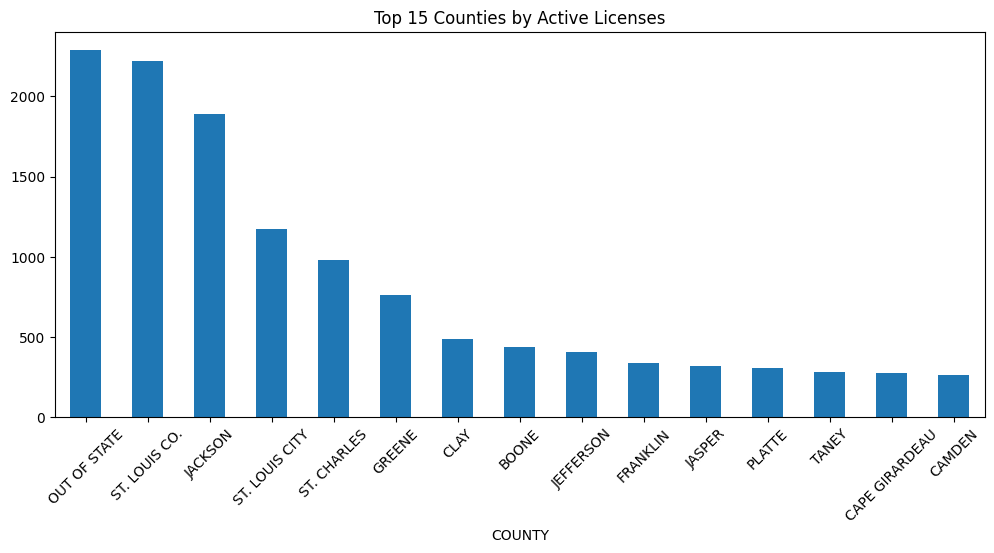

In [36]:
# 3. County distribution
plt.figure(figsize=(12,5))
df['COUNTY'].value_counts().head(15).plot(kind='bar')
plt.title("Top 15 Counties by Active Licenses")
plt.xticks(rotation=45)
plt.show()

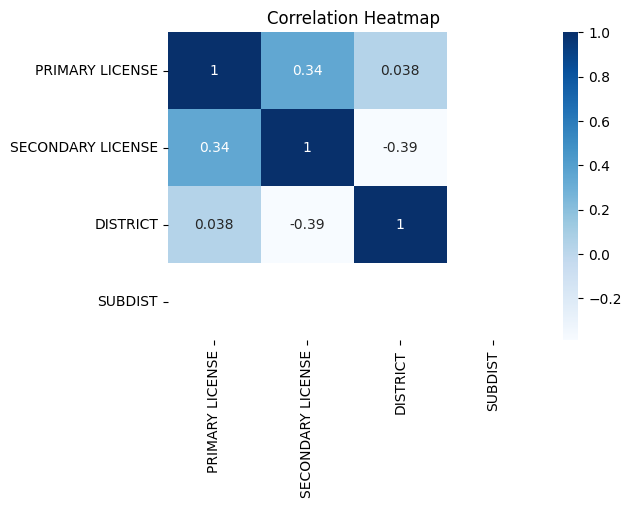

In [37]:
# 4. Correlation heatmap
num_cols = ['PRIMARY LICENSE', 'SECONDARY LICENSE', 'DISTRICT', 'SUBDIST']
plt.figure(figsize=(6,4))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='Blues')
plt.title("Correlation Heatmap")
plt.show()

In [38]:
# INTERACTIVE VISUALISATIONS (PLOTLY)

In [39]:
# Interactive bar chart for top cities
fig = px.bar(
    top_cities,
    title="Interactive: Top 10 Cities with Alcohol Licenses",
    labels={'value':'Count', 'index':'City'}
)
fig.show()

In [64]:
import pandas as pd

# Replace with your actual file path
df = pd.read_csv("/content/MyDrive/masuri dataset/Missouri_Active_Alcohol_License_Data (1).csv")

# Quick look at data
print(df.head())
print(df.columns)


                           LICENSEE                        DBANAME  \
0                      CA KAUTZ LLC    WICKED WILLIES SPORTS GRILL   
1             WATERWAY GAS AND WASH    WATERWAY GAS & WASH COMPANY   
2                  PERMACULTURE LLC  BLACK MOUNTAIN WINE HOUSE STL   
3  PIERPONT'S AT UNION STATION, LLC    PIERPONT'S AT UNION STATION   
4           JJG SELECT HOLDINGS LLC        CJ'S RESTAURANT AND BAR   

  STREET NUMBER                          STREET         CITY STATE  ZIPCODE  \
0          5384             OSAGE BEACH PARKWAY  OSAGE BEACH    MO    65065   
1         10850                   MANCHESTER RD     KIRKWOOD    MO    63122   
2           354                 -56 N BOYLE AVE  SAINT LOUIS    MO    63108   
3            30  W. PERSHING RD., STE 900 & 340  KANSAS CITY    MO    64108   
4          2974                       HIGHWAY K     O'FALLON    MO    63368   

   PHONE NUMBER  PRIMARY LICENSE  SECONDARY LICENSE PRIMARY TYPE  \
0    5736931777           288686    

Horizontal Bar Chart - Count of license types

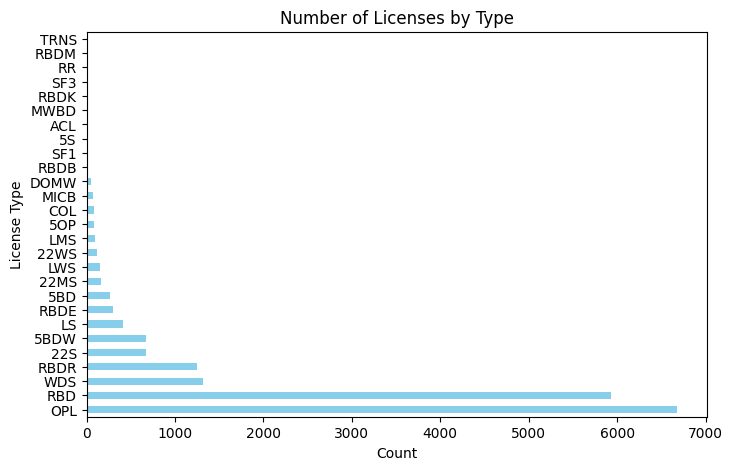

In [66]:
import matplotlib.pyplot as plt

# Count of licenses by type
license_counts = df['PRIMARY TYPE'].value_counts()

plt.figure(figsize=(8,5))
license_counts.plot(kind='barh', color='skyblue')
plt.title('Number of Licenses by Type')
plt.xlabel('Count')
plt.ylabel('License Type')
plt.show()

Donut Chart - Distribution of license types

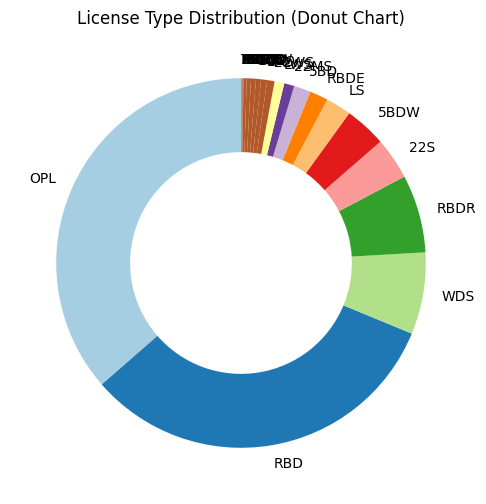

In [67]:
colors = plt.cm.Paired(range(len(license_counts)))
plt.figure(figsize=(6,6))
plt.pie(license_counts, labels=license_counts.index, colors=colors, startangle=90, wedgeprops={'width':0.4})
plt.title('License Type Distribution (Donut Chart)')
plt.show()


Sunburst chart - License type by city

In [69]:
import plotly.express as px

# Sunburst: City → License Type
fig = px.sunburst(df, path=['CITY', 'PRIMARY TYPE'], values=None, title='Sunburst: Licenses by City and Type')
fig.show()

Heatmap - example licence by city and license type

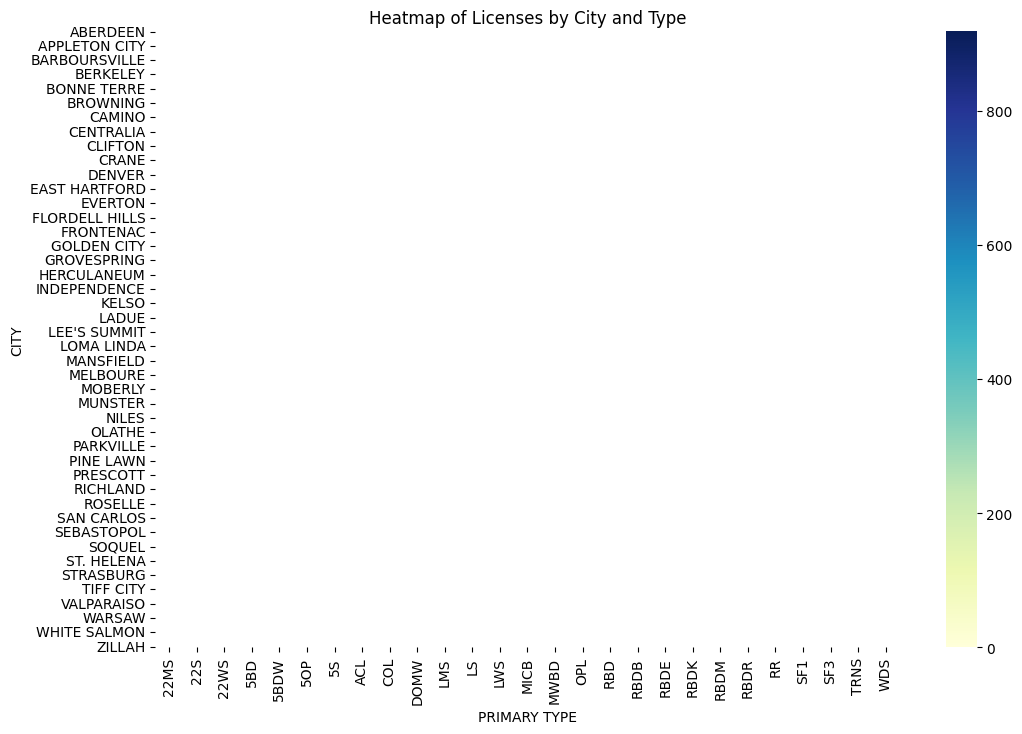

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pivot table
heatmap_data = df.pivot_table(index='CITY', columns='PRIMARY TYPE', aggfunc='size', fill_value=0)

plt.figure(figsize=(12,8))
sns.heatmap(heatmap_data, cmap='YlGnBu', linewidths=0.5)
plt.title('Heatmap of Licenses by City and Type')
plt.show()

In [40]:
# Interactive scatter map for available geocoordinates
map_df = df.dropna(subset=['LAT', 'LNG'])

fig = px.scatter_mapbox(
    map_df,
    lat='LAT',
    lon='LNG',
    hover_name='DBANAME',
    hover_data=['CITY', 'PRIMARY TYPE'],
    zoom=4,
    height=500
)

fig.update_layout(
    mapbox_style="open-street-map",
    title="Interactive Map of Alcohol Licensed Businesses"
)
fig.show()

In [41]:
# FINAL CLEANED DATA EXPORT

df.to_csv("cleaned_missouri_licenses.csv", index=False)
print("Cleaned file saved.")

Cleaned file saved.
